In [14]:
include("../utils.jl")
using .Utils

In [91]:
using DataFrames, CSV, Plots, StatsBase, DSP, FFTW, Distributions, DifferentialEquations

In [3]:
dfs = Utils.adj_all_games()

140-element Array{Any,1}:
 668×35 DataFrame. Omitted printing of 30 columns
│ Row │ sport  │ league │ game_id │ a_team           │ h_team                │
│     │ String │ String │ Int64   │ String           │ String                │
├─────┼────────┼────────┼─────────┼──────────────────┼───────────────────────┤
│ 1   │ BASK   │ NBA    │ 4253821 │ Sacramento Kings │ Golden State Warriors │
│ 2   │ BASK   │ NBA    │ 4253821 │ Sacramento Kings │ Golden State Warriors │
│ 3   │ BASK   │ NBA    │ 4253821 │ Sacramento Kings │ Golden State Warriors │
│ 4   │ BASK   │ NBA    │ 4253821 │ Sacramento Kings │ Golden State Warriors │
│ 5   │ BASK   │ NBA    │ 4253821 │ Sacramento Kings │ Golden State Warriors │
│ 6   │ BASK   │ NBA    │ 4253821 │ Sacramento Kings │ Golden State Warriors │
│ 7   │ BASK   │ NBA    │ 4253821 │ Sacramento Kings │ Golden State Warriors │
│ 8   │ BASK   │ NBA    │ 4253821 │ Sacramento Kings │ Golden State Warriors │
│ 9   │ BASK   │ NBA    │ 4253821 │ Sacramento Kings │ 

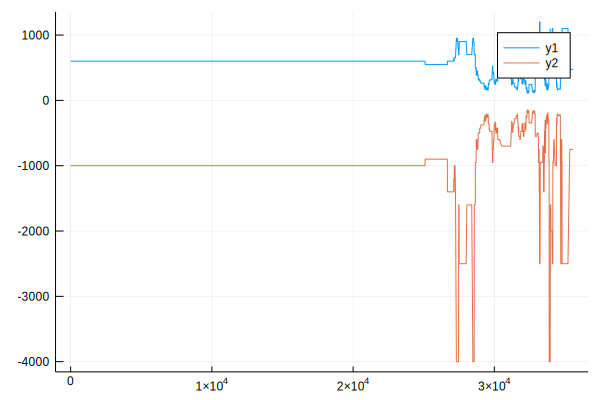

In [4]:
p = Utils.plot_game(dfs[1])

In [7]:
Utils.eq(-500)
Utils.roi(120, 120)

0.2

In [16]:
df = dfs[1]
x = df.a_odds_ml
y = df.h_odds_ml

,sport,league,game_id,a_team,h_team,cur_time,lms_date
,String,String,Int64,String,String,Float64,Dates…
1,BASK,NBA,4253821,Sacramento Kings,Golden State Warriors,0.0,2019-02-20
2,BASK,NBA,4253821,Sacramento Kings,Golden State Warriors,1329.04,2019-02-20
3,BASK,NBA,4253821,Sacramento Kings,Golden State Warriors,1405.68,2019-02-20
4,BASK,NBA,4253821,Sacramento Kings,Golden State Warriors,1646.59,2019-02-20
5,BASK,NBA,4253821,Sacramento Kings,Golden State Warriors,1914.81,2019-02-20
6,BASK,NBA,4253821,Sacramento Kings,Golden State Warriors,1988.74,2019-02-20
7,BASK,NBA,4253821,Sacramento Kings,Golden State Warriors,2064.29,2019-02-20
8,BASK,NBA,4253821,Sacramento Kings,Golden State Warriors,2400.05,2019-02-20
9,BASK,NBA,4253821,Sacramento Kings,Golden State Warriors,2438.19,2019-02-20


In [20]:
a, a2 = Utils.arr_roi(x, y)
conva = convert(Array{Float32}, a)
conva2 = convert(Array{Float32}, a2)

(Any[-4//11, -4//11, -4//11, -4//11, -4//11, -4//11, -4//11, -4//11, -4//11, -4//11  …  -19//26, -19//26, -19//26, -2//9, -3//17, -3//17, -3//17, -3//17, -3//17, -3//17], Any[-2//35, -2//35, -2//35, -2//35, -2//35, -2//35, -2//35, -2//35, -2//35, -2//35  …  1//120, 1//120, 1//120, -1//10, -21//230, -21//230, -21//230, -21//230, -21//230, -21//230])

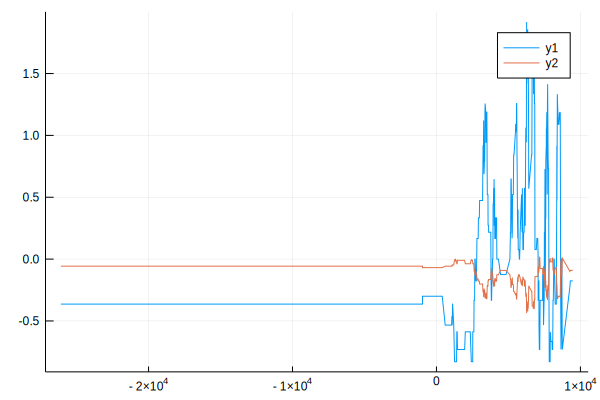

In [25]:
plot(df.last_mod_to_start, [a, a2])

In [86]:
println(var(conva))
println(var(conva2))

0.41641212
0.010462412


In [87]:
println(cov(conva, conva2))
println(cor(conva, conva2))

-0.06567443
-0.99498975


In [80]:
N = length(x[200:end])
# Sample period
Ts = 1 / (1.1 * N) 
# Start time 
t0 = 0 
tmax = t0 + N * Ts
# time coordinate
t = t0:Ts:tmax

0.0:0.001938360147315371:0.909090909090909

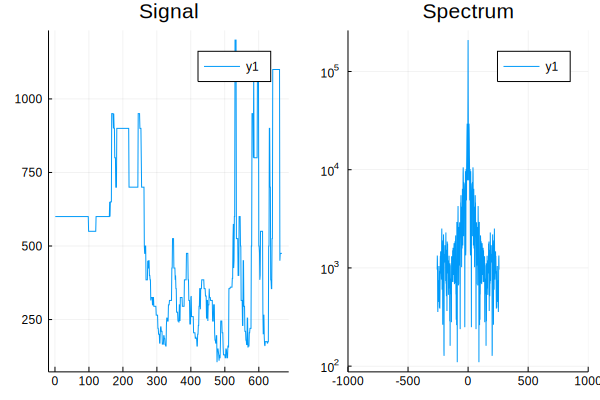

In [89]:
# signal 
# signal = sin.(2π * 60 .* t) # sin (2π f t) 

# Fourier Transform of it 
F = fft(x[200:end]) |> fftshift
freqs = fftfreq(N, 1.0/Ts) |> fftshift

# plots 
time_domain = plot(x, title = "Signal")
freq_domain = plot(freqs, abs.(F), title = "Spectrum", xlim=(-1000, +1000), yscale=:log10) 
plot(time_domain, freq_domain, layout = 2)

In [112]:
# theta

function θ(u, p, t)
#     tspan = p[1]  # tuple
    α = -1
    # u0 , u[1] odds
#     τ = abs(t - tspan[2])
    du = α / t
end
tspan = (0.1, 30.)
u0 = 200.
prob = ODEProblem(θ, u0, tspan)
sol = solve(prob, Tsit5(), dt=1e-4);

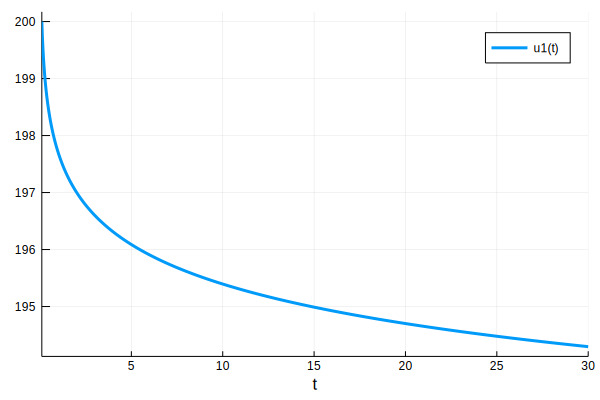

In [113]:
plot(sol)